<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Yolo_Trash_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>YOLO (You Only Look Once)</center></h1></u>

You Only Look Once (YOLO) is an algorithm proposed by Redmond et al in a research study published as a conference paper at the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR), which won the OpenCV People's Choice Award.

YOLO proposes the usage of an end-to-end neural network that provides predictions of bounding boxes and class probabilities all at once, as opposed to the method followed by object detection algorithms before YOLO, which repurposed classifiers to perform detection.
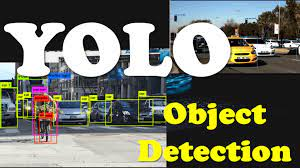

Under YOLO,you will be working on Trash detection project wherein the model will detect whether the image contains trash or not.

In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('ag3DLKsl2vk', width=700, height=400)

<h2><u>Roadmap for the project</h2></u>

* Installing YOLO and other dependencies
* Getting the data and processing it
* Data Annotation
* Creating bounding boxes
* Train the different YOLO models
* Implement Tensorboard
* making predictions


In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('GRtgLlwxpc4', width=700, height=400)

## Note: Implement the notebook in Jupyter Notebook if you are not able to do it in Google Colab.
### **Download the dataset and upload it in your drive:** https://www.kaggle.com/kneroma/tacotrashdataset

In [ ]:
!pip install kaggle

### Connect the Google drive

The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [ ]:
# import drive from google.colab
from google.colab import drive
# mount the drive
drive.mount('/content/drive')

Move the location to Trash detection folder (choose location where you have trash detection data)

In [ ]:
# move location
%cd /content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection

Download the dataset from google drive in zipped form and unzip it.

In [ ]:
#!unzip "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/archive.zip" -d "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/unzipped_taco_dataset.zip"

In [ ]:
#!unzip "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco_saved_files.zip" -d "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/unzipped_taco_saved_files.zip"

Clone the YoloV5 github for using its architecture and for detection

*YOLOv5 🚀 is a family of object detection architectures and models pretrained on the COCO dataset, and represents Ultralytics open-source research into future vision AI methods, incorporating lessons learned and best practices evolved over thousands of hours of research and development.*

Documentation
See the [YOLOv5 Docs](https://docs.ultralytics.com/) for full documentation on training, testing and deployment. bold text

### **Step 1: Install Yolo**



1.  Clone the Yolo repository.
2.  Go to yolov5 folder.
3.  Install all the requirements for running the architecture.




In [ ]:
#!git clone https://github.com/ultralytics/yolov5  # clone
#go to yolov5
%cd yolov5
 # install
!pip install -r requirements.txt

**Install pycocotools
(pycocotools is a Python API that assists in loading, parsing and visualizing the annotations in COCO.)**

Refer: https://pypi.org/project/pycocotools/

In [ ]:
#install pycocotools
!pip install pycocotools

In [ ]:
#change directory to trash detection folder
%cd /content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection

### **Import the required libraries**

* torch: for tensor computation
* Image: for working with images
* os: to handle and work with the operating system
* random: used to generate random numbers,https://docs.python.org/3/library/random.html
* shutil: offers high-level operation on a file like a copy, create, and remote operation on the file,https://docs.python.org/3/library/shutil.html
* train_test_split: to split the data into training and testing data
* ElementTree: represents the whole XML document as a tree,https://docs.python.org/3/library/xml.etree.elementtree.html
* minidom: implementation of the Document Object Model interface, https://docs.python.org/3/library/xml.dom.minidom.html
* tqdm: used for creating Progress Meters or Progress Bars,https://tqdm.github.io/
* ImageDraw: provides simple 2D graphics for Image objects,https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html
* numpy: for array and matrix operations
* matplotlib: for visualizations
* yolov5.utils: https://github.com/ultralytics/yolov5

In [ ]:
!pip install -qr requirements.txt


In [ ]:
#install above mentioned libraries
import torch
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
#from yolov5 import utils
#set random seed to 108
random.seed(108)

The cat command allows us to create single or multiple files, view contain of file, concatenate files and redirect output in terminal or files.
Use cat to view dataset in json format and for custom datas.

In [ ]:
#view annotations.json using cat command
!cat "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/unzipped_taco_dataset/data/annotations.json"

### <u>Train On Custom Data</u>

1. Create dataset.yaml.
2. [COCO128](https://www.kaggle.com/ultralytics/coco128) is a small tutorial dataset composed of the first 128 images in COCO train2017.
3. These same 128 images are used for both training and validation to verify our training pipeline is capable of overfitting. data/coco128.
4. yaml, shown below, is the dataset configuration file that defines

>* an optional download command/URL for auto-downloading,
>* a path to a directory of training images (or path to a *.txt file with a list of training images),
>* the same for our validation images,
>* the number of classes,
>* a list of class names:









In [ ]:
#import COCO
from pycocotools.coco import COCO
#load the annotations.json using COCO
data_source = COCO(annotation_file='/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/unzipped_taco_dataset/data/annotations.json')

**Check all the categories availiable in given trash detection dataset with id and categories**

Use the 'cats' method to do so.

In [ ]:
#view categories
data_source.cats

**Extract names from given dataset and print it**

Now extract the categories of trash from the given data by iterating through it and extracting the name attributes.

In [ ]:
#iterate using enumerate
for k, count in enumerate(data_source.cats):
  #print the number of category and name of trash
  print(count, ' ', data_source.cats[k]['name'])

We see there are 59 categories of trash.
Create a dictionary named as label_transfer.

In [ ]:
#label_transfer = {5: 0, 12: 1}
label_transfer = {5: 0, 12: 1}
label_transfer

coco returns the dictionary of the dataset. Here we can get id's of images with coco.getImgIds() function, after getting image id's we have to load those images for loading the images we can use coco.loadImgs()

In [ ]:
#get the image IDs
img_ids = data_source.getImgIds()
img_ids

**Category IDs gives number of unique ids in given dataset format**

In [ ]:
#get category IDs
catIds = data_source.getCatIds()
catIds

Loading categories using catIds for finding category names

In [ ]:
#use loadCats methods and pass the extracted category IDs
categories = data_source.loadCats(catIds)
categories

Sort category based on id using [lambda](https://www.w3schools.com/python/python_lambda.asp) functions

In [ ]:
#sort the categories
categories.sort(key=lambda x: x['id'])

Create an empty dictonary for labels, classes, label inverse that we need to find in our dataset

In [ ]:
#create classes dictionary
classes = {}
#create coco_labels dictionary
coco_labels = {}
#create coco_labels_inverse dictionary
coco_labels_inverse = {}

Next run a for loop iterating through the sorted categories. Store the category IDs in coco_labels dictionary(keys as len(classes) and values as category ID) and IDs in inverse order in the coco_labels_inverse dictionary(keys as category ID and values as len(classes)). Store the length of classes in classes dictionary(keys as category name and values as len(classes)).

In [ ]:
#iterate through categories
for c in categories:
    #store category IDs in coco_labels(keys-->len(classes))
    coco_labels[len(classes)] = c['id']
    #store len(classes) in coco_labels_inverse(keys-->c['id'])
    coco_labels_inverse[c['id']] = len(classes)
    #store len(classes) in classes(keys-->c['name'])
    classes[c['name']] = len(classes)


View the classes dictionary

In [ ]:
#print classes
classes

In [ ]:
class_num = {}

Create a new directory for storing images and labels using the mkdir command(make directory)

In [ ]:
#!mkdir -p tmp/labels tmp/images
!mkdir -p tmp/labels tmp/images
#save_base_path  = 'tmp/labels/'
save_base_path  = 'tmp/labels/'
#save_image_path = 'tmp/images/'
save_image_path = 'tmp/images/'

Convert .json file to .txt file
Annotate the images using the .txt file obtained and make a binding box aroung the object.

### **Bounding Boxes**
In object detection, we usually use a bounding box to describe the spatial location of an object. The bounding box is rectangular, which is determined by the  x  and  y  coordinates of the upper-left corner of the rectangle and the such coordinates of the lower-right corner. Another commonly used bounding box representation is the  (x,y) -axis coordinates of the bounding box center, and the width and height of the box.<br><br>
- The code starts by enumerating all the images in a data source.
- The first one is img_id=0, which is the image that was loaded from the data source.
- Then it creates a variable called "img_info" and stores the information about this image in it.
- Next, it saves this image's file name to a new file with "_" as its extension so that when you open up this text file later on, you can see what changes were made to your original .json file.

- Next, it creates another variable called "save_name".
- This will be used for saving any other files that are created during this process of changing an existing json file into a txt-file.
- It then uses split() to separate out the filename from its extension and store them separately in variables called height and width respectively.
- Finally, save_base_path + filename + '.txt' is saved to disk at whatever location you want (I chose my desktop).

- The next line checks if there already exists an empty text document with these two variables as its name; if not then create one now using open().- The code will change the .json file to a .txt file.- The code starts by loading the data from the file.
- The code then goes through each of the annotations and labels them with their corresponding class number.
- If there is an annotation that does not have a label, it will be labeled as 0.
- The next part of the code loops through all of the boxes in each annotation and writes out its coordinates to a list called lines.- The code attempts to create a list of the annotation ids that are present in the image.

- The code then iterates through each annotation id and loads it from the data source.

- Next, it creates a list of strings which will be used as labels for each box in the plot.

- Lastly, if there are any annotations that have not been transferred yet, they will be added to class_num with a label of 0 and 1 respectively.
–


In [ ]:
#iterate through image IDs and show tqdm progress bar
#for index, img_id in tqdm.tqdm(enumerate(img_ids), desc='change .json file to .txt file')
for index, img_id in tqdm.tqdm(enumerate(img_ids), desc='change .json file to .txt file'):
    #get image info,data_source.loadImgs(img_id)[0]
    img_info = data_source.loadImgs(img_id)[0]
    #replace '/' with '_' in file name of images
    save_name = img_info['file_name'].replace('/', '_')
    #split the file name based on '.'
    file_name = save_name.split('.')[0]
   #get height of image
    height = img_info['height']
    #get width of image
    width = img_info['width']
    #save new path of image
    #save_path = save_base_path + file_name + '.txt'
    save_path = save_base_path + file_name + '.txt'
    #set is_exist to False
    is_exist = False
    #open the saved path in write mode
    with open(save_path, mode='w') as fp:
        #get the annotation ID
        annotation_id = data_source.getAnnIds(img_id)
        #create boxes,np.zeros((0, 5))
        boxes = np.zeros((0, 5))
        #check if length of annotation IDs is 0
        if len(annotation_id) == 0:
            #insert ''
            #fp.write('')
            fp.write('')
            #continue
            continue
        #load annotations
        #annotations = data_source.loadAnns(annotation_id)
        annotations = data_source.loadAnns(annotation_id)
        #set a blank string 'lines'
        lines = ''
        #iterate through annotations
        for annotation in annotations:
            #extract label from coco_labels_inverse
            #label = coco_labels_inverse[annotation['category_id']]
            label = coco_labels_inverse[annotation['category_id']]
            #if label in label_transfer.keys():
            if label in label_transfer.keys():
                #set is_exist to True
                is_exist = True
                #get bbox of annotation
                #box = annotation['bbox']
                box = annotation['bbox']
                #check if box[2] < 1 or box[3] < 1:
                if box[2] < 1 or box[3] < 1:
                   #continue
                    continue
                #create boxes
                # box[0] = round((box[0] + box[2] / 2) / width, 6)
                #box[1] = round((box[1] + box[3] / 2) / height, 6)
                #box[2] = round(box[2] / width, 6)
                #box[3] = round(box[3] / height, 6)
                box[0] = round((box[0] + box[2] / 2) / width, 6)
                box[1] = round((box[1] + box[3] / 2) / height, 6)
                box[2] = round(box[2] / width, 6)
                box[3] = round(box[3] / height, 6)
                #label = label_transfer[label]
                label = label_transfer[label]
                #check if label is present in classes
                #if label not in class_num.keys():
                if label not in class_num.keys():
                    #class_num[label] = 0
                    class_num[label] = 0
                #increment class_num[label]
                class_num[label] += 1
                #add the string of label to lines
                lines = lines + str(label)
                #iterate through box
                #for i in box:
                for i in box:
                    #add the string of each box in lines
                    #lines += ' ' + str(i)
                    lines += ' ' + str(i)
                #add a blank line in lines
                lines += '\n'
        #add these lines to the file
        #fp.writelines(lines)
        fp.writelines(lines)
    #check if is_exist is True
    if is_exist:
        #copy the dataset paths and image paths
        #shutil.copy('/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/unzipped_taco_dataset/data/{}'.format(img_info['file_name']), os.path.join(save_image_path, save_name))
        shutil.copy('/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/unzipped_taco_dataset/data/{}'.format(img_info['file_name']), os.path.join(save_image_path, save_name))
    #else
    else:
        #remove save_path
        os.remove(save_path)

### **Split the dataset into train test valid using split-folder library**

In [ ]:
#install split-folders
!pip install split-folders

#Split data into:-
80% train <br>
10% test<br>
10% validate

https://pypi.org/project/split-folders/

In [ ]:
#import splitfolders
import splitfolders
#split the folders
#splitfolders.ratio('tmp', output="taco", seed=1337, ratio=(.8, 0.1,0.1))
splitfolders.ratio('tmp', output="taco", seed=1337, ratio=(.8, 0.1,0.1))

### **Train the model created**

* The commands below reproduce YOLOv5 COCO results. Models and datasets download automatically from the latest YOLOv5 release.
* Training times for YOLOv5n/s/m/l/x are 1/2/4/6/8 days on a V100 GPU (Multi-GPU times faster).
* Use the largest --batch-size possible, or pass --batch-size -1 for YOLOv5 AutoBatch.
* Batch sizes shown for V100-16GB.

python train.py --data coco.yaml --cfg yolov5n.yaml --weights '' --batch-size 128


|Model |size<br><sup>(pixels) |mAP<sup>val<br>0.5:0.95 |mAP<sup>val<br>0.5 |Speed<br><sup>CPU b1<br>(ms) |Speed<br><sup>V100 b1<br>(ms) |Speed<br><sup>V100 b32<br>(ms) |params<br><sup>(M) |FLOPs<br><sup>@640 (B)
|---                    |---  |---    |---    |---    |---    |---    |---    |---
|[YOLOv5n][assets]      |640  |28.4   |46.0   |**45** |**6.3**|**0.6**|**1.9**|**4.5**
|[YOLOv5s][assets]      |640  |37.2   |56.0   |98     |6.4    |0.9    |7.2    |16.5
|[YOLOv5m][assets]      |640  |45.2   |63.9   |224    |8.2    |1.7    |21.2   |49.0
|[YOLOv5l][assets]      |640  |48.8   |67.2   |430    |10.1   |2.7    |46.5   |109.1
|[YOLOv5x][assets]      |640  |50.7   |68.9   |766    |12.1   |4.8    |86.7   |205.7
|                       |     |       |       |       |       |       |       |
|[YOLOv5n6][assets]     |1280 |34.0   |50.7   |153    |8.1    |2.1    |3.2    |4.6
|[YOLOv5s6][assets]     |1280 |44.5   |63.0   |385    |8.2    |3.6    |12.6   |16.8
|[YOLOv5m6][assets]     |1280 |51.0   |69.0   |887    |11.1   |6.8    |35.7   |50.0
|[YOLOv5l6][assets]     |1280 |53.6   |71.6   |1784   |15.8   |10.5   |76.7   |111.4
|[YOLOv5x6][assets]<br>+ [TTA][TTA]|1280<br>1536 |54.7<br>**55.4** |**72.4**<br>72.3 |3136<br>- |26.2<br>- |19.4<br>- |140.7<br>- |209.8<br>-

# Different Yolo models comparisons
<a href="https://ibb.co/26nzD5T"><img src="https://i.ibb.co/8BKyWXH/model-comparison.png" alt="model-comparison" border="0"></a>

Train a YOLOv5s model on COCO128 by specifying dataset, batch-size, image size and either pretrained --weights yolov5s.pt (recommended), or randomly initialized --weights '' --cfg yolov5s.yaml (not recommended). Pretrained weights are auto-downloaded from the latest YOLOv5 release.

Example for training YOLOv5s on COCO128 for 3 epochs<br>
$ python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt

All training results are saved to runs/train/ with incrementing run directories, i.e. runs/train/exp2, runs/train/exp3 etc. For more details see the Training section of our tutorial notebook.

In [ ]:
#!python /content/drive/MyDrive/ColabNote/trash_detect/yolov5/train.py --img 320 --batch 1 --epochs 10 --data /content/drive/MyDrive/ColabNote/trash_detect/yolov5/taco8.yaml --cfg /content/drive/MyDrive/ColabNote/trash_detect/yolov5/models/yolov5s.yaml --weights yolov5s.pt --cache
!python "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/train.py" --img 320 --batch 1 --epochs 10 --data "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/taco8.yaml" --cfg "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/models/yolov5s.yaml" --weights yolov5s.pt --cache

# [Tensorboard](https://www.tensorflow.org/tensorboard/get_started)
##Local Logging<br>
All results are logged by default to runs/train, with a new experiment directory created for each new training as runs/train/exp2, runs/train/exp3, etc. View train and val jpgs to see mosaics, labels, predictions and augmentation effects.

TensorBoard provides the visualization and tooling needed for machine learning experimentation:
* Tracking and visualizing metrics such as loss and accuracy
* Visualizing the model graph (ops and layers)
* Viewing histograms of weights, biases, or other tensors as they change over time
* Projecting embeddings to a lower dimensional space
* Displaying images, text, and audio data
* Profiling TensorFlow programs

Refer:https://www.tensorflow.org/tensorboard

In [ ]:
# Tensorboard  (optional)
#%load_ext tensorboard
#%tensorboard --logdir /content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train
%load_ext tensorboard
%tensorboard --logdir "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train"

In [ ]:
#copy weights
#!cp /content/drive/MyDrive/ColabNote/trash_detect/yolov5/runs/train/exp/weights/best.pt
!cp "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp2/weights/best.pt" weights


In [ ]:
#view files
#!ls /content/drive/MyDrive/ColabNote/trash_detect/taco/val/images
!ls "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco/val/images"

Use ipython library to display the images

In [ ]:
#import Image
from IPython.display import Image

Lets check sample images in our dataset

In [ ]:
#display any image
Image('taco/val/images/batch_13_000009.jpg', width=500)

### **Lets make our predictions**

In [ ]:
#!python "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/detect.py" --weights "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp/weights/best.pt" --img 416 --conf 0.1 --source "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco/val/images"
!python "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/detect.py" --weights "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp2/weights/best.pt" --img 416 --conf 0.1 --source "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco/val/images"

In [ ]:
#!python "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/detect.py" --weights "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp/weights/best.pt" --img 416 --conf 0.1 --source "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco/test/yolov5/detect.py" --weights "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp/weights/best.pt" --img 416 --conf 0.1 --source "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco/test/images"
!python "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/detect.py" --weights "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp2/weights/best.pt" --img 416 --conf 0.1 --source "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco/test/yolov5/detect.py" --weights "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp2/weights/best.pt" --img 416 --conf 0.1 --source "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco/test/images"

In [ ]:
#!python "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/detect.py" --source "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco/train/images/batch_10_000015.jpg" --weights "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp/weights/best.pt"
!python "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/detect.py" --source "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/taco/train/images/batch_10_000015.jpg" --weights "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp2/weights/best.pt"

In [ ]:
# first, display our ground truth data
Image(filename= "/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp2/val_batch0_pred.jpg" , width=400 , height=400)

In [ ]:
# first, display our ground truth data
Image(filename='/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/train/exp2/train_batch0.jpg' , width=400 , height=400)

In [ ]:
# first, display our ground truth data
Image(filename='/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/detect/exp5/batch_1_000115.JPG' , width=400 , height=400)

In [ ]:
# first, display our ground truth data
Image(filename='/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/detect/exp5/batch_7_000082.JPG' , width=400 , height=400)

Hence we can observe that trash is detected and bounding boxes are drawn around it. Lets display all the images. Import glob,the glob module is used to retrieve files/pathnames matching a specified pattern.https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/.

In [ ]:
#import glob,Image and display
import glob
from IPython.display import Image, display
#iterate through images
#for imageName in glob.glob('/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/detect/exp5/*.jpg'):
for imageName in glob.glob('/content/drive/MyDrive/CloudyML_Time Series Analysis/Trash Detection/yolov5/runs/detect/exp5/*.jpg'): #assuming JPG
    #display the image
    display(Image(filename=imageName , height=500, width=500))
    print("\n")

### Congratulations!!! You've done it.

In this assignment you implemented:

* YOLO
* Trash detection project


Keep practising!!<br><br>

## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br>
![Goodbye-Keep-Up-The-Good-Work-Good-Bye-Meme.jpg](https://m.media-amazon.com/images/I/31Tvvzb1dDL.jpg)